# Retificador de meia onda (Carga R/C)

<center>
<img width="300" height="500" src="Figuras/06_meia_onda_rc.png">
</center>

In [2]:
from funcoes import *
%run funcoes.py
%matplotlib inline

In [3]:
################# Definições 1 ##################
V_pk = 120*sqrt(2)
Freq = 60
R = 500
C = 100e-6

In [8]:
################# Definições 2 ##################
V_pk = 220*sqrt(2)
Freq = 60
R = 100

Vc1_max = V_pk

#Define Valor médio
V_med = 170
Vc1_min = V_med*2 - Vc1_max

##OU##

#Define Valor Vc1_min
#Vc1_min = 210
#V_med = (Vc1_max + Vc1_min)/2

P_r = V_med**2 / R

C = 2* (P_r/(Freq*(Vc1_max**2 - Vc1_min**2)))

print(C, "F")

0.00010038240946582444 F


0.8417866778757895


/home/fbroering/Dropbox/2019-1/ELP/retificadores_python/funcoes.py:172: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = integrate.quad(func, alpha, beta)


# - Tensão na carga - # 
Vpk:	 169.7056274847714 
Vm: 	 148.10777383534574 
Vrms: 	 148.660859926674
# - Corrente na fase - # 
Ipk: 	 4.506481958759281 
Im: 	 0.29621554753542295 
Irms: 	 0.9597874180622336
# - Corrente no resistor - # 
Ipk: 	 0.3394095733236611 
Im: 	 0.2962155476706913 
Irms: 	 0.2973217198533478
# - Corrente no capacitor - # 
Ipk: 	 4.252920088803067 
Im: 	 3.17216606540274e-11 
Irms: 	 0.9125742062670614
# - Corrente de saída - # 
Ipk: 	 4.506481958759281 
Im: 	 0.29621554753542295 
Irms: 	 0.9597874180622336
# - Potências de uma fase - # 
Ppk:	 539.442747115583 
P: 	 38.13471026177726 
S: 	 115.17449016746802
# - Fatores - # 
FP:	 0.33110379048631305 
THD V:	 0.0018850159739448907 
THD I:	 2.1032104609416753


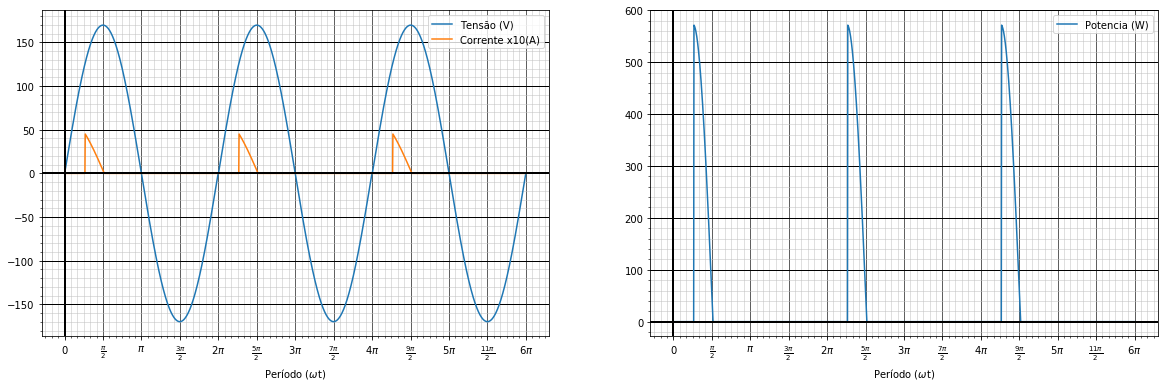

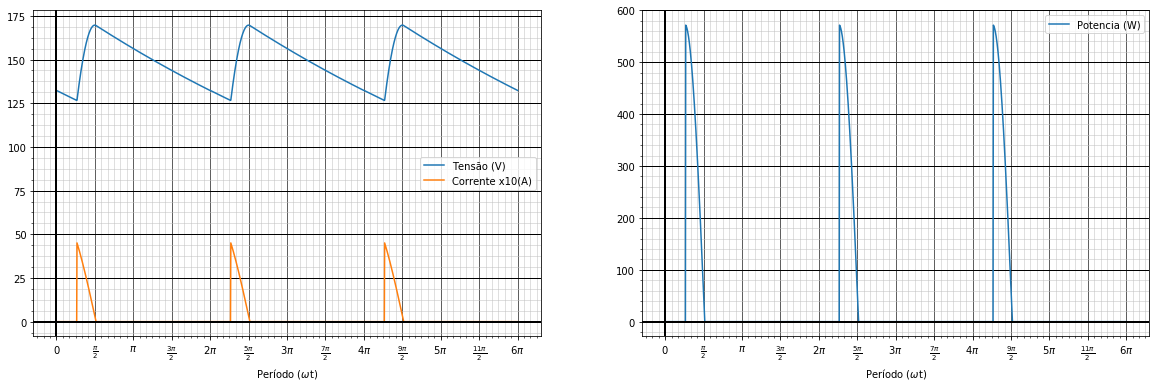

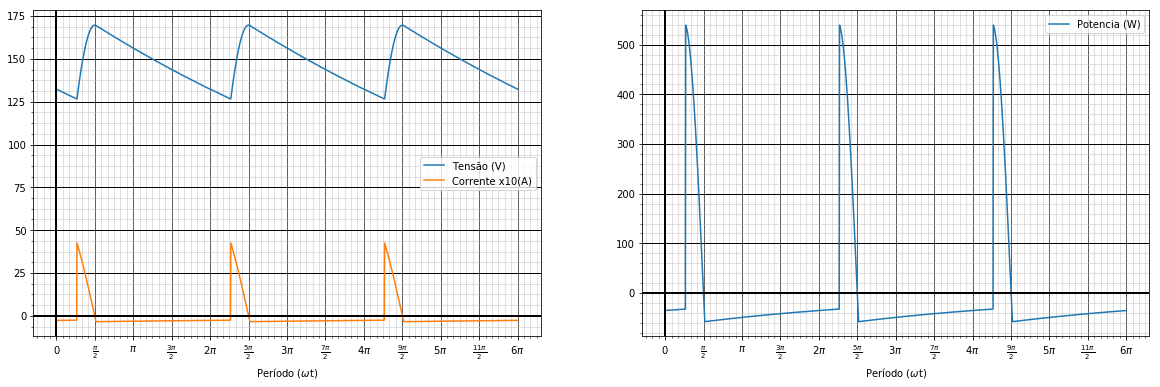

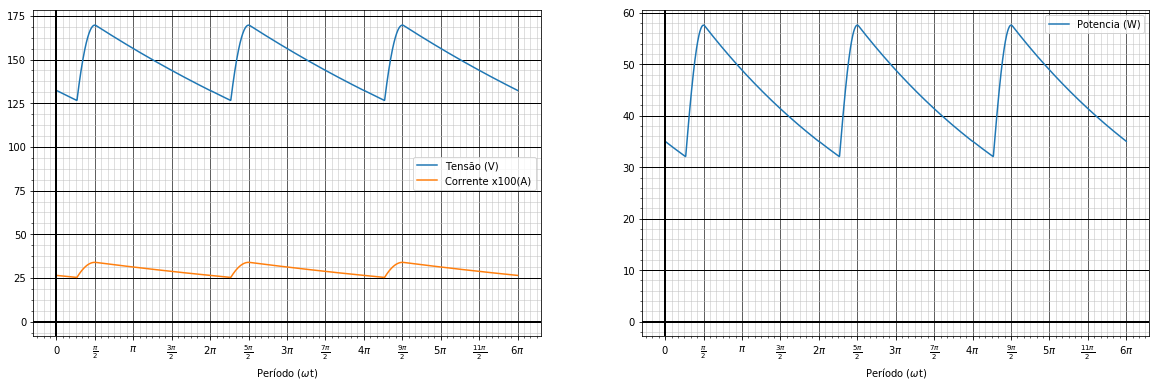

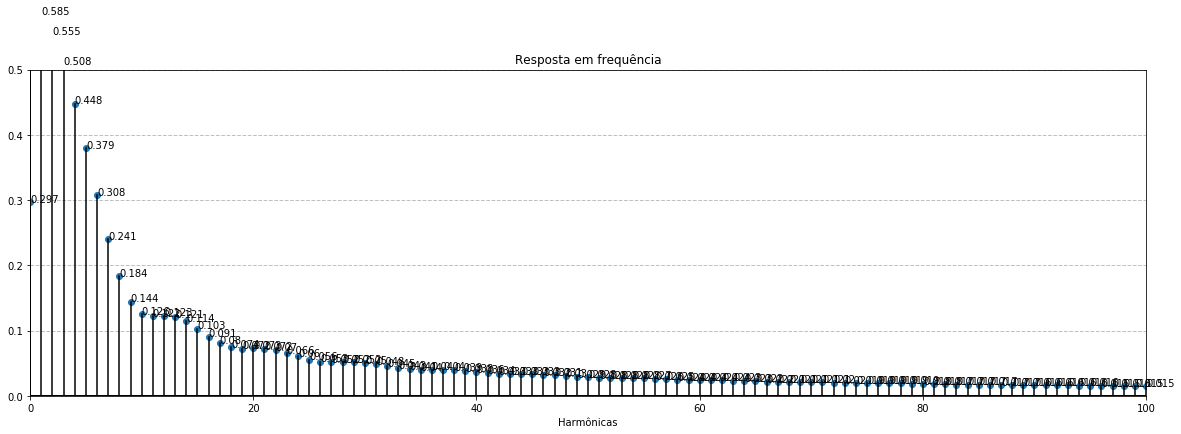

In [4]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA RC ####################

w = 2*pi*Freq

XC = 1 / (w * C)
#XC = 50

XRC = complex(R,-XC)
#XRC = 100 - 30j

Z = abs(XRC)

teta = pi - atan(w*R*C)
#(r, phi) = polar(z)
tal = 1 / (R * C)

T = 2*pi

ab = calculo_ab(f'sin(x) - sin({teta})*exp(-(2*{pi}+x-{teta})/{w*R*C})', pi/2, 'numpy')
a = ab[0]
print(a)

# Tensão de saída do retificador
func_vout = f'({rampa_RC(V_pk, teta, w*R*C, 2*pi)} *({degrau(0, a)}))'
# Parcela
func_vout = f'{func_vout} + ({V_pk}*sin(x)*{degrau(a,teta)})'
func_vout = f'{func_vout} + ({rampa_RC(V_pk, teta, w*R*C)} *({degrau(teta, 2*pi)}))'
Vout_media = calculo_medio(func_vout)
Vout_rms = calculo_rms(func_vout)

# Corrente no resistor do retificador trifásico com ponto médio
func_ir = f'(({func_vout})/{R})'
Ir_media = calculo_medio(func_ir)
Ir_rms = calculo_rms(func_ir)
Ir_pk = calculo_pk(func_ir)

# Corrente no capacitor do retificador
func_ic = f'({w*C*V_pk}*cos(x)*{degrau(a,teta)})'
func_ic = f'{func_ic} + ({rampa_RC(-V_pk/R, teta, w*R*C,2*pi)}*{degrau(0,a)})'
func_ic = f'{func_ic} + ({rampa_RC(-V_pk/R, teta, w*R*C)}*{degrau(teta,2*pi)})'
Ic_media = calculo_medio(func_ic)
Ic_rms = calculo_rms(func_ic)
Ic_pk = calculo_pk(func_ic)

# Corrente de saída do retificador
func_iout = f'{func_ic} + {func_ir}'
# Calculos com base na forma de onda
Iout_media = calculo_medio(func_iout)
Iout_rms = calculo_rms(func_iout)
Iout_pk = calculo_pk(func_iout)

# Tensão de entrada
func_vin = f'{V_pk}*sin(x)'
Vin_media = calculo_medio(func_vin)
Vin_rms = calculo_rms(func_vin)

# Corrente de entrada de uma fase do retificador trifásico com ponto médio
func_iin = func_iout
Iin_media = calculo_medio(func_iin)
Iin_rms = calculo_rms(func_iin)
Iin_pk = calculo_pk(func_iin)

# Potencia ativa e aparente da entrada do retificador
func_p = f'{func_vin} * {func_iin}'
P = calculo_medio(func_p)
S = Iin_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_vin, T)
thdI = calculo_thd(func_iin, T)

print("# - Tensão na carga - #"       , "\nVpk:\t" , V_pk   , "\nVm: \t"  , Vout_media, "\nVrms: \t", Vout_rms)
print("# - Corrente na fase - #"      , "\nIpk: \t", Iin_pk , "\nIm: \t"  , Iin_media , "\nIrms: \t", Iin_rms)
print("# - Corrente no resistor - #"  , "\nIpk: \t", Ir_pk  , "\nIm: \t"  , Ir_media  , "\nIrms: \t", Ir_rms)
print("# - Corrente no capacitor - #" , "\nIpk: \t", Ic_pk  , "\nIm: \t"  , Ic_media  , "\nIrms: \t", Ic_rms)
print("# - Corrente de saída - #"     , "\nIpk: \t", Iout_pk, "\nIm: \t"  , Iout_media, "\nIrms: \t", Iout_rms)
print("# - Potências de uma fase - #" , "\nPpk:\t" , P_pk   , "\nP: \t"   , P         , "\nS: \t"   , S)
print("# - Fatores - #"               , "\nFP:\t"  , FP     , "\nTHD V:\t", thdV      , "\nTHD I:\t", thdI)

plot_info(func_vin, func_iin, xlim=(0, T))
plot_info(func_vout, func_iout, xlim=(0, T))
plot_info(func_vout, func_ic, xlim=(0, T))
plot_info(func_vout, func_ir, xlim=(0, T))

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_iin, ax2, T=2*np.pi, n_harmonicas = 100)